<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Katty/blob/main/Actividad_semana8_parte_1_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

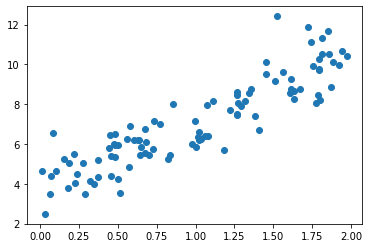

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

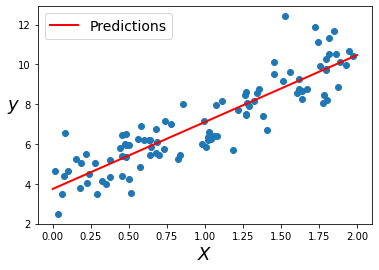

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

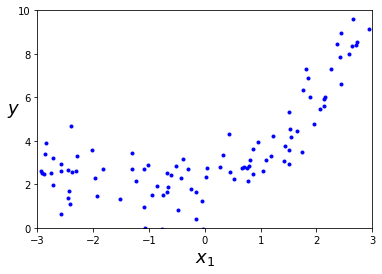

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

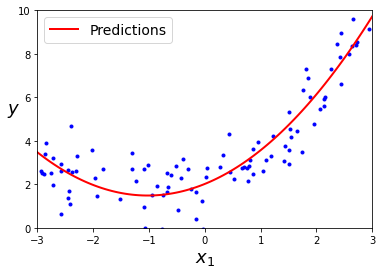

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

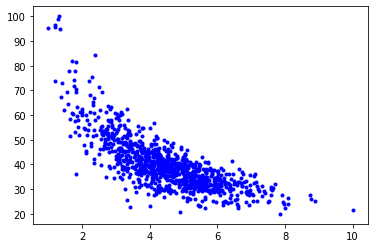

In [27]:
plt.plot(X,y,'b.')

In [28]:
from sklearn.model_selection import train_test_split

#Ejercicio 1.1 - Dividiendo los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

#Ejercicio 1.2 - Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada
LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(X_train, y_train)

LinReg.coef_, LinReg.intercept_


(array([-6.23532656]), 67.84077316014555)

$\hat{y}  = -6.23x +67.84$


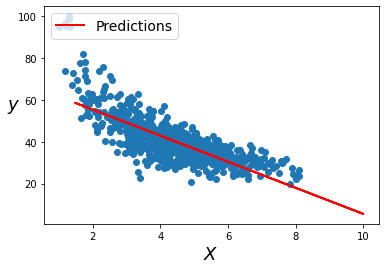

In [29]:
y_pred = LinReg.predict(X_test)

#Visualizando los datos
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [30]:
#errores

from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.114671236837881
Root Mean Squared Error: 6.866577869447153
r2_score 0.5541625933073363


In [31]:
#Ejercicio 1.3: Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_pol = poly_feat.fit_transform(X_train)

Lin_Reg = LinearRegression(fit_intercept=True)
Lin_Reg.fit(X_pol, y_train)
Lin_Reg.coef_, Lin_Reg.intercept_



(array([-18.26923053,   1.3451808 ]), 92.4601615125126)

$\hat{y} =  -18.26X +1.34X^2 + 92.46$

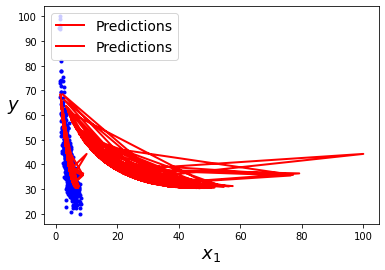

In [32]:
X_new_pol = poly_feat.fit_transform(X_test)
y_np = Lin_Reg.predict(X_new_pol)

#order = np.argsort(X_test.values.ravel())
#sortedX = X_test.values.ravel()[order]
#sortedy = y_test.values.ravel()[order]
#sorted_pred = y_np[order]

plt.plot(X_train, y_train, "b.")
plt.plot(X_new_pol, y_np, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [33]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_np))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_np)))
print('r2_score',r2_score(y_test, y_np))

Error medio Absoluto (MAE): 4.698033744108625
Root Mean Squared Error: 6.352017002247755
r2_score 0.618478419362218


In [34]:
#Ejercicio 1.4: Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada

from sklearn.linear_model import Lasso, Ridge

Lass = Lasso(alpha=0.001)
Lass.fit(X_train, y_train)


Lass.coef_, Lass.intercept_

(array([-6.23473946]), 67.83817492346247)

$\hat{y}  = -6.22x +67.81$

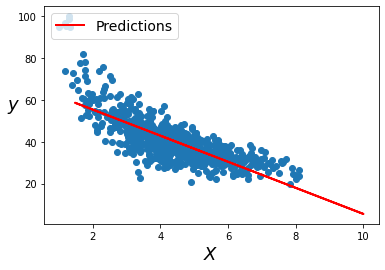

In [35]:
y_predlasso = Lass.predict(X_test)

#Visualizando los datos
plt.scatter(X_train, y_train)
plt.plot(X_test, y_predlasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [36]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predlasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlasso)))
print('r2_score',r2_score(y_test, y_predlasso))

Error medio Absoluto (MAE): 5.114553602101862
Root Mean Squared Error: 6.866421861486418
r2_score 0.5541828518395564


In [37]:
Rid = Ridge(alpha=0.01, max_iter= 10000)
Rid.fit(X_train, y_train)


Rid.coef_, Rid.intercept_

(array([-6.2352808]), 67.84057065095433)

$\hat{y}  = -6.23x +67.84$

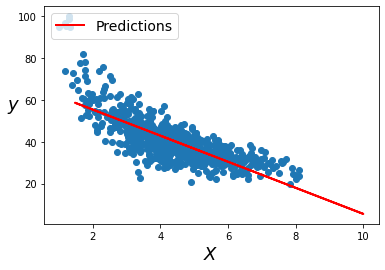

In [38]:
y_predrid = Rid.predict(X_test)

#Visualizando los datos
plt.scatter(X_train, y_train)
plt.plot(X_test, y_predrid, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [39]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predrid))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predrid)))
print('r2_score',r2_score(y_test, y_predrid))

Error medio Absoluto (MAE): 5.114662068267749
Root Mean Squared Error: 6.866565706338255
r2_score 0.5541641727736232


In [40]:
#Ejercicio 1.4 Finalmente grafica :
#MAE (de los cuatro métodos)
#R2 (de los cuatro métodos)

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR
  modelos.append(LinearRegression(fit_intercept=True))
  nombres.append('LR')
  #polinomial
  modelos.append(LinearRegression(fit_intercept=True))
  nombres.append('PR')
  # Lasso:
  modelos.append(Lasso(alpha=0.1))
  nombres.append('LASSO')
  # Ridge:
  modelos.append(Ridge(alpha=0.1))
  nombres.append('RIDGE')
  
  return modelos, nombres

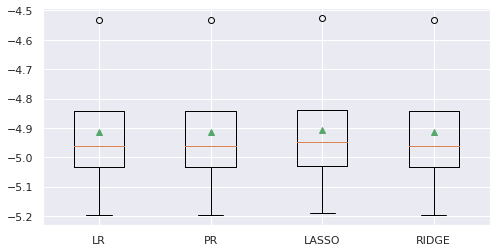

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate 

modelos, nombres = get_modelsRegs()
scores = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('m',modelos[i])])
  
  metric = {'neg_mean_absolute_error','r2'}

  resultado = cross_validate(pipeline, X_train, y_train,
                          scoring=metric)

  scores.append(resultado)
  
sns.set(rc={'figure.figsize':(8,4)})
bpmae = list()
for i in range(len(scores)):
  rr = scores[i]['test_neg_mean_absolute_error']
  bpmae.append(rr)

plt.boxplot(bpmae, labels=nombres, showmeans=True)
plt.show()

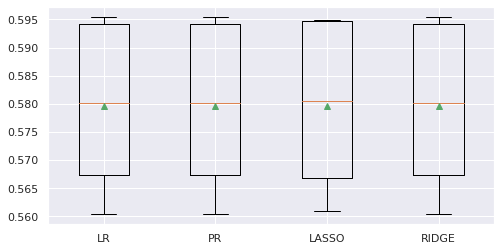

In [42]:
sns.set(rc={'figure.figsize':(8,4)})
bpr2 = list()
for i in range(len(scores)):
  rr = scores[i]['test_r2']
  bpr2.append(rr)

plt.boxplot(bpr2, labels=nombres, showmeans=True)
plt.show()

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Para la segmentacion de los datos de entrenamiento y prueba se dejo un porcentaje del 20% para estos últimos.

Dentro de los modelos seleccionados, el que mejor se comporta es el modelo de regresion plinomial pues su MAE es de 4.69, siendo el mas bajo de todos, revisando la metrica R2 este modelo tambien presenta la mejor metrica (0.6184), es decir, tiene un mejor ajuste con respecto a los demas modelos, visualmente tambien se puede afirmar esta informacion, pues el modelo polinomial es que el mejor se ajusta a los datos.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20325,518500480,20140811T000000,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
2781,5701500030,20140601T000000,1505000.0,4,3.50,3480,7232,2.0,0,0,...,9,2580,900,1926,2010,98144,47.5859,-122.291,2380,5642
18899,7273100026,20150407T000000,682000.0,4,2.50,2390,53941,2.0,0,0,...,8,2390,0,1989,0,98053,47.7066,-122.080,2610,104108
7561,6752300120,20141201T000000,258900.0,3,2.25,1400,10436,1.0,0,0,...,7,1040,360,1985,0,98058,47.4261,-122.144,1860,9318
971,2009001600,20150506T000000,265000.0,3,1.00,1070,9000,1.0,0,0,...,7,1070,0,1950,0,98198,47.4061,-122.330,1840,12000
14133,4074300150,20150417T000000,460000.0,4,1.75,1560,7200,1.0,0,0,...,6,860,700,1943,0,98115,47.7001,-122.279,1420,7200
19698,9268850860,20150505T000000,715000.0,5,3.25,2710,2356,2.0,0,0,...,8,2230,480,2013,0,98027,47.5394,-122.028,2160,2108
14422,8137500730,20140507T000000,500000.0,3,2.50,1940,37565,1.0,0,0,...,8,1940,0,1987,0,98027,47.4801,-122.063,2560,37565
11266,9827700105,20140917T000000,549000.0,3,2.00,2330,3600,1.5,0,0,...,7,1580,750,1900,0,98122,47.6025,-122.303,1750,3600
20901,3175200220,20150113T000000,410000.0,3,2.50,2150,4332,2.0,0,0,...,8,2150,0,2013,0,98019,47.7373,-121.969,2140,4332


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [45]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


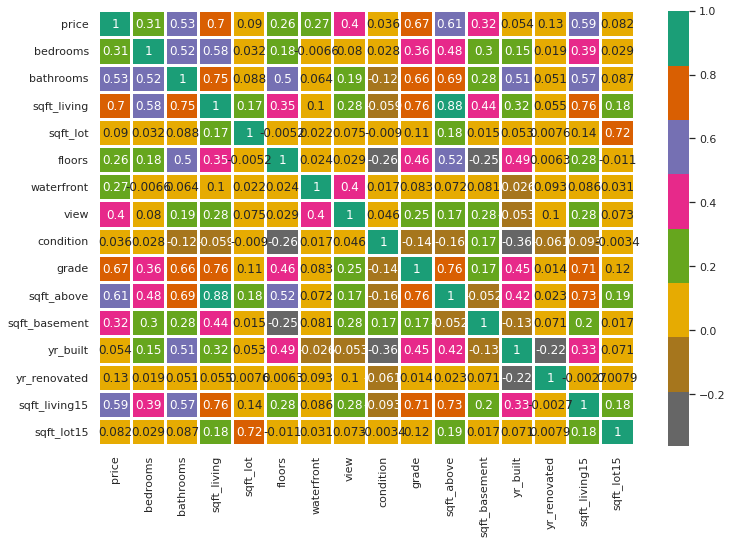

In [47]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [48]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [50]:
#Regresión Múltiple Lineal: Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

LinReg2 = LinearRegression(fit_intercept=True)
LinReg2.fit(X_train, y_train)

LinReg2.coef_, LinReg2.intercept_


(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750272e+01,  6.02175566e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.26274124]))

In [51]:
y_pred = LinReg2.predict(X_test)

In [52]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.13882733323
Root Mean Squared Error: 232133.3676240722
r2_score 0.6579723205007892


In [53]:
#Regresión Múltiple Polinomial: Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_pol = poly_feat.fit_transform(X_train)

Lin_Reg2 = LinearRegression(fit_intercept=True)
Lin_Reg2.fit(X_pol, y_train)
Lin_Reg2.coef_, Lin_Reg2.intercept_

(array([[ 9.33879687e+05, -1.09273860e+06, -5.37390428e+02,
         -2.78634102e+01, -2.07489950e+06, -3.95371495e+06,
         -2.88652531e+05,  5.58519576e+05,  1.09862983e+06,
         -1.38818478e+02, -3.01577501e+02, -8.59702783e+04,
         -2.95366775e+03,  3.99963414e+03, -3.40100355e+01,
          9.57586804e+02,  7.49940820e+03, -1.40076562e+01,
         -1.85239669e-02,  8.58010319e+03, -1.14952153e+04,
         -3.08060610e+02, -5.24565914e+03, -5.36863409e+03,
         -9.99978948e-01, -1.43956003e+01, -4.67077597e+02,
         -9.13138297e+00,  1.72800783e+01,  2.15615872e-01,
         -9.63204388e+03,  1.52795786e+01, -1.35647630e-01,
         -2.59102127e+04,  4.33756643e+04,  3.82989181e+03,
         -1.08068921e+03,  2.22968388e+04,  1.45391755e+01,
          1.44644985e+00,  5.03114428e+02, -1.70846902e+01,
         -1.72874570e+01, -5.60714143e-02, -4.03248131e+00,
         -5.41426547e+00,  4.83377617e+00,  1.60300670e+02,
         -1.42705827e+01,  1.31213999e+0

In [54]:
X_pol_new2 = poly_feat.fit_transform(X_test)
y_predp = Lin_Reg2.predict(X_pol_new2)

In [55]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predp)))
print('r2_score',r2_score(y_test, y_predp))

Error medio Absoluto (MAE): 121313.84710967973
Root Mean Squared Error: 186261.48278206724
r2_score 0.7797924413783968


In [56]:
#Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.

Rid2 = Ridge(alpha=20, max_iter= 1000)
Rid2.fit(X_train, y_train)

Rid2.coef_, Rid2.intercept_

(array([[-3.85131901e+04,  4.11823999e+04,  1.08378444e+02,
          1.36077679e-02,  3.16373553e+04,  4.75816487e+05,
          4.48186517e+04,  2.12879626e+04,  1.19070581e+05,
          4.83411488e+01,  6.00373020e+01, -3.54359481e+03,
          1.42556743e+01,  2.86619830e+01, -5.45888708e-01]]),
 array([6140317.15671205]))

In [57]:
y_predr2 = Rid2.predict(X_test)

In [58]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predr2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predr2)))
print('r2_score',r2_score(y_test, y_predr2))

Error medio Absoluto (MAE): 137683.3656200489
Root Mean Squared Error: 232749.0053946903
r2_score 0.6561557408443508


In [59]:
Lass2 = Lasso(alpha=0.001, max_iter=1000)
Lass2.fit(X_train, y_train)

Lass2.coef_, Lass2.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.82008036e+04,  4.14661337e+04,  2.93482240e+02,  1.71356922e-02,
         3.16916868e+04,  5.52690873e+05,  4.12493284e+04,  2.12221415e+04,
         1.19493214e+05, -1.37714624e+02, -1.25272098e+02, -3.55090211e+03,
         1.32602241e+01,  2.90059278e+01, -5.48132606e-01]),
 array([6151359.18359226]))

In [60]:
y_predlass2 = Lass2.predict(X_test)

In [61]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predlass2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlass2)))
print('r2_score',r2_score(y_test, y_predlass2))

Error medio Absoluto (MAE): 137480.13926004805
Root Mean Squared Error: 232133.36878370366
r2_score 0.6579723170835635


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+14, tolerance: 2.065e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.270e+14, tolerance: 2.085e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

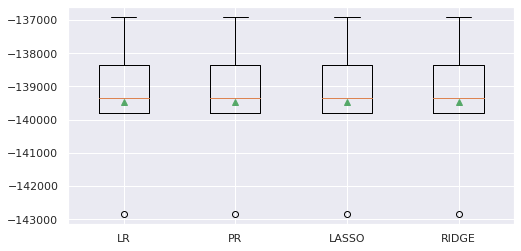

In [62]:
#Finalmente gráfica :
#MAE (de los cuatro métodos)
#R2 (de los cuatro métodos)
modelos, nombres = get_modelsRegs()
scores = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('m',modelos[i])])
  
  metric = {'neg_mean_absolute_error','r2'}

  resultado = cross_validate(pipeline, X_train, y_train,
                          scoring=metric)

  scores.append(resultado)
  
sns.set(rc={'figure.figsize':(8,4)})
bpmae = list()
for i in range(len(scores)):
  rr = scores[i]['test_neg_mean_absolute_error']
  bpmae.append(rr)

plt.boxplot(bpmae, labels=nombres, showmeans=True)
plt.show()

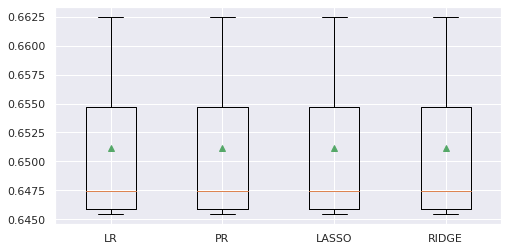

In [63]:
sns.set(rc={'figure.figsize':(8,4)})
bpr2 = list()
for i in range(len(scores)):
  rr = scores[i]['test_r2']
  bpr2.append(rr)

plt.boxplot(bpr2, labels=nombres, showmeans=True)
plt.show()

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

Los porcentajes de entrenamiento y prueba ya estaban definidos, para este ejercicio se asignó 90% a los datos de entrenamiento y 10% a los datos de prueba, lo que permite al modelo tener mayor volumen de datos para el aprendizaje.

Para el caso del metodo Lasso se asigno un alpha mas pequeño que para Ridge, ya que este modelo castiga mas haciendo converger las variables que no considera importantes a 0.

El metodo que mejor se aproxima nuevamente es el metodo de regresión polinomial cuyo R2 es 0.7797 (aprox 0.78), el MAE para este modelo 121.314 se ubica muy por debajo de error medio absoluto de los demas modelos. Estas métricas de error tienen oportunidad de mejora por medio del ajuste de algunos hiperparametros del modelo.